In [299]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ml import *
#!conda install torchvision -y
from torchvision.datasets import ImageFolder
from torchvision import transforms

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Préparation des données

Notre dataset contient environ 4400 images répartis en 8 classes de monuments. Nous avons aussi divisé les données en 3 parties:
- les données d'entraînement `training set`,
- les données de validation `validation set`
et enfin
- les données de test `test set`

Les images de notre dataset ne sont pas tous de la même taille.

In [300]:
data_dir = "data/"
print(os.listdir(data_dir))

classes = os.listdir(data_dir + "/train")
print(classes)

['valid', '.DS_Store', 'test', 'train']
['moulin-rouge', 'palais-de-l-elysee', 'pont-neuf', 'place-de-la-concorde', 'jardin-des-tuileries', 'hotel-de-ville', 'arc-de-triomphe', 'musee-d-orsay']


In [301]:
moulin_rouge_files = os.listdir(data_dir+"/train/moulin-rouge")
print("Nombre de données d'entraînement de la classe moulin-rouge:", len(moulin_rouge_files))

pont_neuf_files = os.listdir(data_dir+"/train/pont-neuf")
print("Nombre de données d'entraînement de la classe pont-neuf:", len(pont_neuf_files))

Nombre de données d'entraînement de la classe moulin-rouge: 391
Nombre de données d'entraînement de la classe pont-neuf: 487


In [302]:
train_dataset = ImageFolder(data_dir+'/train', transform=transforms.Compose([
                                                                        transforms.ToTensor(),
                                                                        transforms.Resize((64, 64))
                                                                        ]))

valid_dataset = ImageFolder(data_dir+'/valid', transform=transforms.Compose([
                                                                        transforms.ToTensor(),
                                                                        transforms.Resize((64, 64))
                                                                        ]))

In [303]:
print(train_dataset.classes)

['arc-de-triomphe', 'hotel-de-ville', 'jardin-des-tuileries', 'moulin-rouge', 'musee-d-orsay', 'palais-de-l-elysee', 'place-de-la-concorde', 'pont-neuf']


In [304]:
def showImg(tensor, label):
    fig, ax = plt.subplots()
    ax.imshow(tensor.permute(1, 2, 0))
    ax.set_title(f'Label: {dataset.classes[label]} ({str(label)})')
    ax.set_xlabel(f'{tensor.shape}')
    ax.set_xticks([])
    ax.set_yticks([]);
    return ax

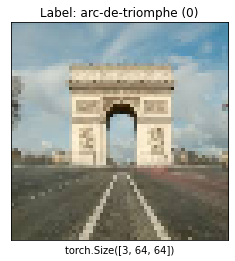

In [305]:
img, label = train_dataset[0]

showImg(img, label);

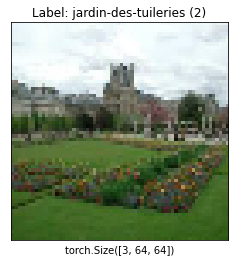

In [306]:
showImg(*train_dataset[1000]);

In [308]:
#dataset[3416][0]
X_train = np.array([train_dataset[i][0] for i in range(len(train_dataset))])
Y_train = np.array([train_dataset[i][1] for i in range(len(train_dataset))])

X_valid = np.array([valid_dataset[i][0] for i in range(len(valid_dataset))])
Y_valid = np.array([valid_dataset[i][1] for i in range(len(valid_dataset))])

<ipython-input-308-0a818edfcec0>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train = np.array([train_dataset[i][0] for i in range(len(train_dataset))])
<ipython-input-308-0a818edfcec0>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_valid = np.array([valid_dataset[i][0] for i in range(len(valid_dataset))])


In [329]:
for output in range(len(train_dataset)):
    Y_train = []
    if train_dataset[output][1] == 0:
        Y_train.append([1, 0, 0, 0, 0, 0, 0, 0])
    elif train_dataset[output][1] == 1:
        Y_train.append([0, 1, 0, 0, 0, 0, 0, 0])
    elif train_dataset[output][1] == 2:
        Y_train.append([0, 0, 1, 0, 0, 0, 0, 0])
    elif train_dataset[output][1] == 3:
        Y_train.append([0, 0, 0, 1, 0, 0, 0, 0])
    elif train_dataset[output][1] == 4:
        Y_train.append([0, 0, 0, 0, 1, 0, 0, 0])
    elif train_dataset[output][1] == 5:
        Y_train.append([0, 0, 0, 0, 0, 1, 0, 0])
    elif train_dataset[output][1] == 6:
        Y_train.append([0, 0, 0, 0, 0, 0, 1, 0])
    elif train_dataset[output][1] == 7:
        Y_train.append([0, 0, 0, 0, 0, 0, 0, 1])

Y_training = np.array(Y_train)
print(Y_training)

[[0 0 0 0 0 0 0 1]]


In [197]:
dict = {}
paths = []

for set_type in ["valid", "train"]:
    for cl in monuments:
        for fi in os.listdir(os.path.join(PATH, set_type, cl)):
            paths.append(PATH+set_type+"/"+cl+"/"+fi)

dict["paths"] = paths
df = pd.DataFrame(dict)
df.head()

,paths
0,data/valid/moulin-rouge/imagesqtbn3AANd9GcRmHO...
1,data/valid/moulin-rouge/imagesqtbn3AANd9GcQ1jc...
2,data/valid/moulin-rouge/imagesqtbn3AANd9GcRXOS...
3,data/valid/moulin-rouge/imagesqtbn3AANd9GcQ2xX...
4,data/valid/moulin-rouge/imagesqtbn3AANd9GcTwoB...


In [198]:
#df["set_type"] = 
df["temp"] = df.paths.str.split("/")

In [199]:
for name, n in zip(["set_type", "class", "filename"],range(1, len(df["temp"][0]))):
    df[name] = df["temp"].apply((lambda x: x[n]))
df.drop(columns="temp", inplace=True)
df.head()

,paths,set_type,class,filename
0,data/valid/moulin-rouge/imagesqtbn3AANd9GcRmHO...,valid,moulin-rouge,imagesqtbn3AANd9GcRmHOC8ixXUQRkqw7Tr6AeelFCEaV...
1,data/valid/moulin-rouge/imagesqtbn3AANd9GcQ1jc...,valid,moulin-rouge,imagesqtbn3AANd9GcQ1jcIjjQwWxAqdqUWadGrthfsjp2...
2,data/valid/moulin-rouge/imagesqtbn3AANd9GcRXOS...,valid,moulin-rouge,imagesqtbn3AANd9GcRXOScrjcT4IdTde18WmDjDcuAWpa...
3,data/valid/moulin-rouge/imagesqtbn3AANd9GcQ2xX...,valid,moulin-rouge,imagesqtbn3AANd9GcQ2xXTh4HX30iQt1FxPbKO4qtVUkz...
4,data/valid/moulin-rouge/imagesqtbn3AANd9GcTwoB...,valid,moulin-rouge,imagesqtbn3AANd9GcTwoBVVSZOBFj6JniJlIuEPTcTQIU...


In [204]:
def resized_images(imgs):
    res = []
    for image in imgs:
        img = Image.open(image)
        rimg = img.resize((32, 32))
        res.append(rimg)
    return res

df["img"] = resized_images(df["paths"])

ValueError: Length of values (13667328) does not match length of index (4449)

In [201]:
#Y = [[] for _ in range(len(df))]
#Y = [[1, 0, 0, 0, 0, 0, 0, 0] for d in df.iterrows() if d["class"] == "moulin-rouge"]
#print(len(Y))


Y = np.array([])
for _, d in df.iterrows():
    if d["class"] == "moulin-rouge":
        Y.append(Y, [1, 0, 0, 0, 0, 0, 0, 0])
    elif d["class"] == "palais-de-l-elysee":
        Y.append([0, 1, 0, 0, 0, 0, 0, 0])
    elif d["class"] == "pont-neuf":
        Y.append([0, 0, 1, 0, 0, 0, 0, 0])
    elif d["class"] == "place-de-la-concorde":
        Y.append([0, 0, 0, 1, 0, 0, 0, 0])
    elif d["class"] == "jardin-des-tuileries":
        Y.append([0, 0, 0, 0, 1, 0, 0, 0])
    elif d["class"] == "hotel-de-ville":
        Y.append([0, 0, 0, 0, 0, 1, 0, 0])
    elif d["class"] == "arc-de-triomphe":
        Y.append([0, 0, 0, 0, 0, 0, 1, 0])
    elif d["class"] == "musee-d-orsay":
        Y.append([0, 0, 0, 0, 0, 0, 0, 1])

df["Y"] = Y

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [180]:
df.head()

,paths,set_type,class,filename,img,Y
0,data/valid/moulin-rouge/imagesqtbn3AANd9GcRmHO...,valid,moulin-rouge,imagesqtbn3AANd9GcRmHOC8ixXUQRkqw7Tr6AeelFCEaV...,None,"[1, 0, 0, 0, 0, 0, 0, 0]"
1,data/valid/moulin-rouge/imagesqtbn3AANd9GcQ1jc...,valid,moulin-rouge,imagesqtbn3AANd9GcQ1jcIjjQwWxAqdqUWadGrthfsjp2...,None,"[1, 0, 0, 0, 0, 0, 0, 0]"
2,data/valid/moulin-rouge/imagesqtbn3AANd9GcRXOS...,valid,moulin-rouge,imagesqtbn3AANd9GcRXOScrjcT4IdTde18WmDjDcuAWpa...,None,"[1, 0, 0, 0, 0, 0, 0, 0]"
3,data/valid/moulin-rouge/imagesqtbn3AANd9GcQ2xX...,valid,moulin-rouge,imagesqtbn3AANd9GcQ2xXTh4HX30iQt1FxPbKO4qtVUkz...,None,"[1, 0, 0, 0, 0, 0, 0, 0]"
4,data/valid/moulin-rouge/imagesqtbn3AANd9GcTwoB...,valid,moulin-rouge,imagesqtbn3AANd9GcTwoBVVSZOBFj6JniJlIuEPTcTQIU...,None,"[1, 0, 0, 0, 0, 0, 0, 0]"


In [169]:
#df["img"].astype("float32")
df["img"] /= 255.0

,paths,set_type,class,filename,img,Y
0,data/valid/moulin-rouge/imagesqtbn3AANd9GcRmHO...,valid,moulin-rouge,imagesqtbn3AANd9GcRmHOC8ixXUQRkqw7Tr6AeelFCEaV...,"[[[0.01568627450980392, 0.01568627450980392, 0...","[1, 0, 0, 0, 0, 0, 0, 0]"
1,data/valid/moulin-rouge/imagesqtbn3AANd9GcQ1jc...,valid,moulin-rouge,imagesqtbn3AANd9GcQ1jcIjjQwWxAqdqUWadGrthfsjp2...,"[[[0.3137254901960784, 0.24705882352941178, 0....","[1, 0, 0, 0, 0, 0, 0, 0]"
2,data/valid/moulin-rouge/imagesqtbn3AANd9GcRXOS...,valid,moulin-rouge,imagesqtbn3AANd9GcRXOScrjcT4IdTde18WmDjDcuAWpa...,"[[[0.13333333333333333, 0.12941176470588237, 0...","[1, 0, 0, 0, 0, 0, 0, 0]"
3,data/valid/moulin-rouge/imagesqtbn3AANd9GcQ2xX...,valid,moulin-rouge,imagesqtbn3AANd9GcQ2xXTh4HX30iQt1FxPbKO4qtVUkz...,"[[[0.26666666666666666, 0.48627450980392156, 0...","[1, 0, 0, 0, 0, 0, 0, 0]"
4,data/valid/moulin-rouge/imagesqtbn3AANd9GcTwoB...,valid,moulin-rouge,imagesqtbn3AANd9GcTwoBVVSZOBFj6JniJlIuEPTcTQIU...,"[[[0.6274509803921569, 0.6392156862745098, 0.6...","[1, 0, 0, 0, 0, 0, 0, 0]"


In [170]:
X = np.asarray(df["img"])
Y = np.asarray(df["Y"])

In [171]:
print(X)
print(Y)

[array([[[0.01568627, 0.01568627, 0.02352941],
         [0.01568627, 0.01568627, 0.02352941],
         [0.01568627, 0.01568627, 0.02352941],
         ...,
         [0.01176471, 0.01176471, 0.01960784],
         [0.01176471, 0.01176471, 0.01960784],
         [0.01176471, 0.01176471, 0.01960784]],

        [[0.01568627, 0.01568627, 0.02352941],
         [0.01568627, 0.01568627, 0.02352941],
         [0.01568627, 0.01568627, 0.02352941],
         ...,
         [0.01176471, 0.01176471, 0.01960784],
         [0.01176471, 0.01176471, 0.01960784],
         [0.01176471, 0.01176471, 0.01960784]],

        [[0.01568627, 0.01568627, 0.02352941],
         [0.01568627, 0.01568627, 0.02352941],
         [0.01568627, 0.01568627, 0.02352941],
         ...,
         [0.01176471, 0.01176471, 0.01960784],
         [0.01176471, 0.01176471, 0.01960784],
         [0.01176471, 0.01176471, 0.01960784]],

        ...,

        [[0.14117647, 0.01960784, 0.00784314],
         [0.14901961, 0.02745098, 0.01568627]

### MLP 

In [ ]:


model, len_output_layer = create_mlp_model()